# Principal component analysis

Principal component analysis (PCA) is a statistical procedure that helps in reducing the dimension of feature space.

[PCA](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) here is blog that explains the PCA intuitively. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#MNIST dataset download from Kaggle:
##https://www.kaggle.com/c/digit-recognizer/data
d0 = pd.read_csv("train.csv")

In [3]:
#print first five row
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
#drop the label column
l = d0['label']
d = d0.drop('label', axis = 1)

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


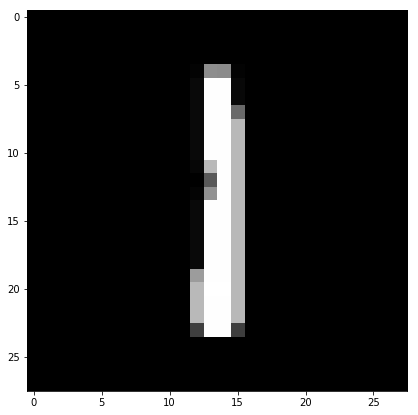

1


In [14]:
#display a no. with its label
plt.figure(figsize= (7,7))
idx=2

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap = 'gray')
plt.show()

print(l[idx])

In [15]:
#Pick first 15k data-points 
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data =", data.shape)

the shape of sample data = (15000, 784)


In [20]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [21]:
#find the covariance matrix which is : A^T*A
sample_data = standardized_data
#matrix multiplication
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of variance matrix =", covar_matrix.shape)

The shape of variance matrix = (784, 784)


Finding the top two eigen values and corresponding eigen vectors as we want to reduce to dimension to 2. The parameter eigvals defined from low value to high value. So choosing the top 2 (782,783)

In [22]:
from scipy.linalg import eigh

#find the eigen vaectors and eigen values of the covariance matrix
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("shape of eigen vectors=", vectors.shape)
vectors = vectors.T

print("Updated shape of eigen vectors =", vectors.shape)


shape of eigen vectors= (784, 2)
Updated shape of eigen vectors = (2, 784)


In [24]:
#projecting the original data sample onto the plane
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("resultant new data points", vectors.shape, "X", sample_data.shape,'=', new_coordinates.shape)

resultant new data points (2, 784) X (15000, 784) = (2, 15000)


In [28]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


In [36]:
new_coordinates

array([[ -5.5586608 ,  -5.04355835,   1.        ],
       [  6.19363477,  19.30527806,   0.        ],
       [ -1.90987794,  -7.67877525,   1.        ],
       ..., 
       [ -2.14793723,  -1.50726893,   8.        ],
       [  3.20412249,  -6.53731291,   9.        ],
       [ -6.87896871,  -1.25625388,   6.        ]])

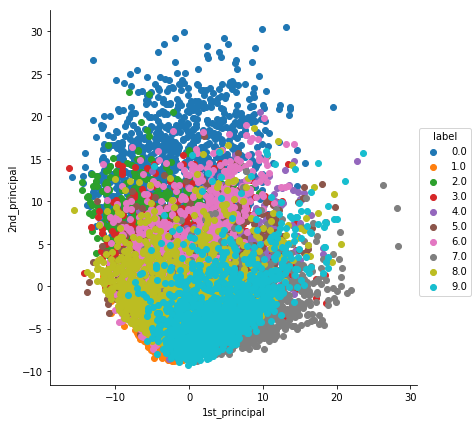

In [32]:
import seaborn as sns
sns.FacetGrid(dataframe, hue ='label', size = 6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

#### The 784 dimesion data has been transformed to a 2D data.